In [2]:
from core.DQNAgent import DQNAgent
import gym
import numpy as np
import torch
from tqdm import tqdm
import glob
import os
from IPython.display import Video
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle


import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

def plot_videos(videos_path='.', output_file_path='.'):
  stringa = 'ffmpeg -i \"concat:'
  elenco_video = glob.glob(f'{videos_path}/*.mp4')
  if len(elenco_video) == 0:
      print('0 mp4 found in this path')
      return
  elenco_file_temp = []
  for f in elenco_video:
    file = videos_path + '/temp' + str(elenco_video.index(f) + 1) + '.ts'
    os.system('ffmpeg -i ' + f + ' -c copy -bsf:v h264_mp4toannexb -f mpegts ' + file)
    elenco_file_temp.append(file)
  for f in elenco_file_temp:
    stringa += f
    if elenco_file_temp.index(f) != len(elenco_file_temp)-1:
      stringa += '|'
    else:
      stringa += f'\" -c copy  -bsf:a aac_adtstoasc {output_file_path}'
  os.system(stringa)
  display(Video(output_file_path))

def plot_metrics():
    cycol = cycle('bgrcmk')
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)

    ax1.set_xlabel('episodes')
    ax1.set_ylabel('total_rewards')
    ax1.plot(train_episode_indexes, total_rewards, c=next(cycol))

    ax2.set_xlabel('episodes')
    ax2.set_ylabel('number_steps')
    ax2.plot(train_episode_indexes, number_steps, c=next(cycol))

    ax3.set_xlabel('episodes')
    ax3.set_ylabel('cost_function_means')
    ax3.plot(train_episode_indexes, cost_function_means, c=next(cycol))

    f.tight_layout()

In [4]:
np.random.seed(1000)

env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, 'recording/tmp-videos', force=True, video_callable=lambda episode_id: True)
agent = DQNAgent(env)

DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.000001
total_rewards = []
number_steps = []
cost_function_means = []
train_episode_indexes = []

In [5]:
for i in range(10):
    total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0, render=True, optimize=False)
env.close()
plot_videos('recording/tmp-videos', 'recording/0-episodes.mp4')

10.0	0.06847022538642848
21.0	0.12715370610188345
10.0	0.06752715352190035
20.0	0.16482897050779283
12.0	0.10676744768464051
9.0	0.12339567541383276
12.0	0.098964172288933
11.0	0.09553420115231157
15.0	0.17859585954688786
10.0	0.015281466161171642
20.0	0.22526127817361713
10.0	0.10915886640260677
24.0	0.146597316207976
24.0	0.16657347572150447
9.0	0.06872284577904454
11.0	0.10234025864941931
10.0	0.017238777647786696
10.0	0.10640437165174513
16.0	0.16743370789864695
15.0	0.1399676787885932
14.0	0.07889514237141435
19.0	0.2152535395551151
10.0	0.06003378037215702
17.0	0.1500413726630894
10.0	0.10209431040452126
15.0	0.16928352426590496
15.0	0.1025810276862001
11.0	0.10712038704695276
12.0	0.10213046755208455
10.0	0.057774701667308505
12.0	0.12359332504724786
11.0	0.1002672135981483
11.0	0.06784794623890161
14.0	0.1103548911994976
10.0	0.1019832766909157
15.0	0.13357423378667937
14.0	0.0798017808384558
13.0	0.12896312901234389
12.0	0.0554031260000453
12.0	0.1323172322900745
10.0	0.058887

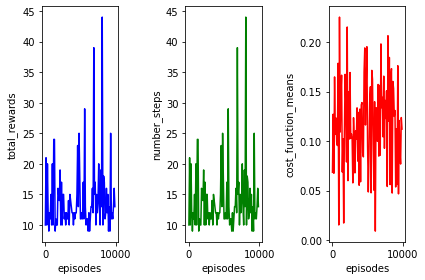

In [5]:
for i in range(10000):
    agent.start_episode(DISCOUNT_FACTOR, LEARNING_RATE, 0.5)
    if i % 100 == 0:
        total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0.5, render=False, optimize=False)
        print(f'{total_reward}\t{mean_cost_function}')
        total_rewards.append(total_reward)
        number_steps.append(steps)
        cost_function_means.append(mean_cost_function)
        train_episode_indexes.append(i)
agent.save('saves/data0.nn')
plot_metrics()

evaluation

train 1 000 (with %10 evaluation)

evaluation

train 9 000 - 10 000 (with %90 evaluation)

evaluation

train 90 000 - 100 000

evaluation

train 900 000 - 1 000 0000

evaluation